In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

# Importing all the required python modules

In [2]:
# Reading the dataset
df = pd.read_csv('income_evaluation.csv')

<h3>Data Exploration</h3>

In [3]:
# Head function will show us the top records of the dataset. By default python shows the top 5 records.
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Tail function will show you the last 5 records of the dataset.
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
# It returns the column labels of the given dataframe.
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [6]:
# Identifying the datatype for every Variable
df.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education-num      int64
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital-gain       int64
 capital-loss       int64
 hours-per-week     int64
 native-country    object
 income            object
dtype: object

<h3>Data Cleaning and Visualization</h3>

In [7]:
# Using df.info() to check if any null value present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Describe is used to view some basic statistical details like, percentile, mean, standard deviation, etc of the given dataframe.
df.describe(include = "all")

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# We will check for any duplicate records in the data. We will remove this data from the data set so that we get only distinct records.
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

24


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [10]:
#Removing the duplicates
df = df.drop_duplicates(subset = None, keep ='first')

In [11]:
# Dropping the rows with null values
df.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
# Correlation Matrix to check if any two collumn are correlated and can be removed.
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education-num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital-gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital-loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours-per-week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


In [13]:
# Defining numerical and categorical variables
num_atr=['age', ' fnlwgt' , ' education-num', ' capital-gain', ' capital-loss', ' hours-per-week']

cat_atr=[' workclass' , ' education' , ' marital-status' , ' occupation' , ' relationship', ' race', ' sex', ' native-country']

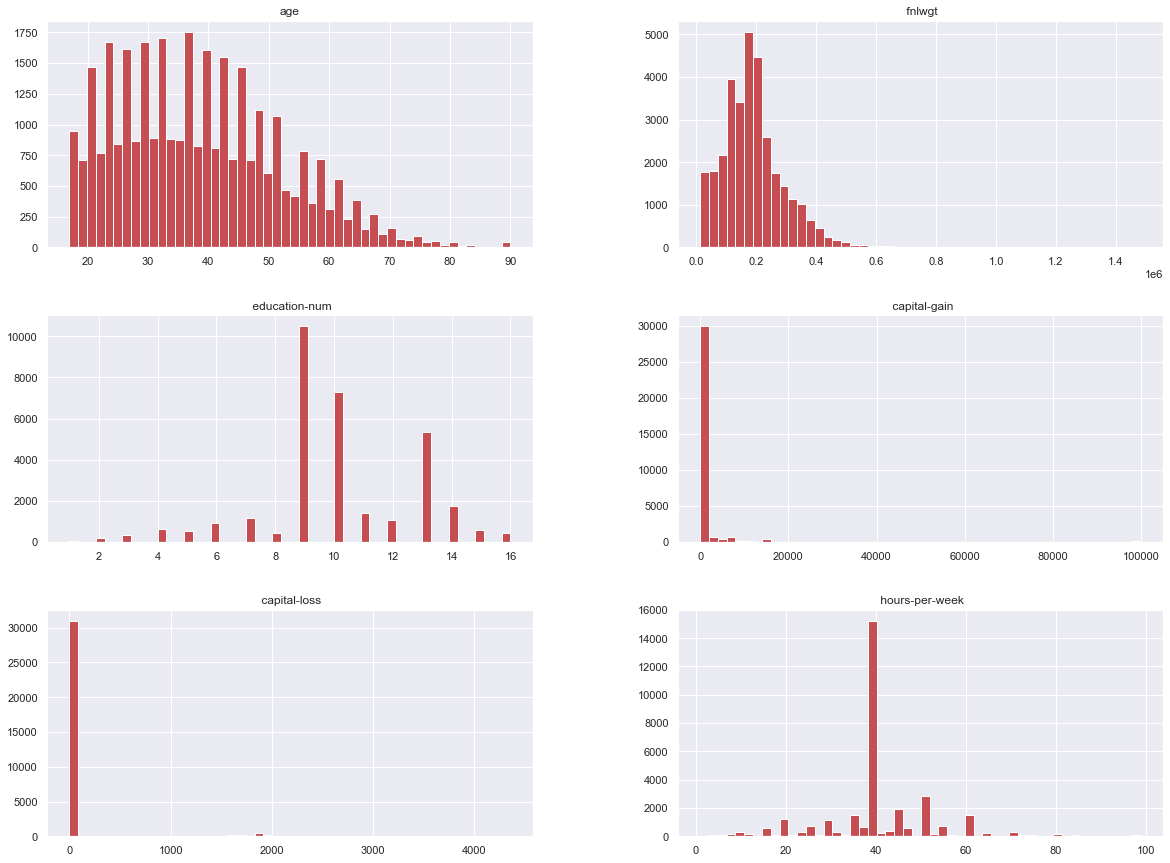

In [14]:
# checking distribution for all the variables in the data by plotting Histograms for all the variable
df.hist(bins=50, figsize=(20,15), color='r')
plt.show()
# Colclusion: age and fnlwgt are are right skewed

<AxesSubplot:>

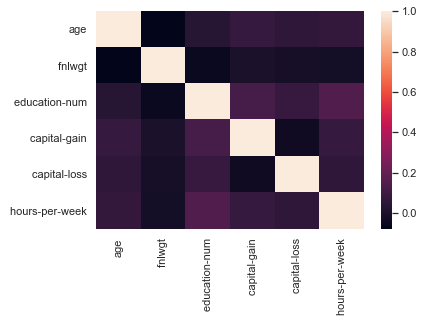

In [15]:
df_corr=df.corr()
sns.heatmap(df_corr)
# Response of the customers is highly dependent on duration of the contact

<h3>KNN Classification Algorithm</h3>

In [36]:
# Dividing the dataset into independent variables and target variables
X= df.drop([' income'], axis=1)
y= df[' income']

In [37]:
# Dividing the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [38]:
X_train.head()
# Training dataset contain a lot of categorical values which needs to be converted into numerical values to apply KNN classifier

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
26677,60,Private,139391,Some-college,10,Married-spouse-absent,Machine-op-inspct,Not-in-family,White,Male,0,0,50,United-States
29875,18,Private,45316,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States
15269,62,Private,122033,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States
27228,38,Private,226311,HS-grad,9,Married-AF-spouse,Other-service,Wife,White,Female,0,0,25,United-States
27063,38,Private,298841,HS-grad,9,Divorced,Adm-clerical,Own-child,White,Female,0,0,40,United-States


In [39]:
# Using LabelEncoder to convert categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)
X_train[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
26677,4,15,3,7,1,4,1,39
29875,4,1,4,8,3,4,0,39
15269,4,11,6,1,1,4,0,39
27228,4,11,1,8,5,4,0,39
27063,4,11,0,1,3,4,0,39


In [40]:
# Using StandardScaler for normal distribution of numerical data
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
stds.fit_transform(X_train[num_atr])

array([[ 1.57315857, -0.47742856, -0.03329817, -0.14513293, -0.21553377,
         0.77889389],
       [-1.50791656, -1.36982678, -1.1979546 , -0.14513293, -0.21553377,
        -1.65301306],
       [ 1.71987643, -0.64208706, -0.42151698, -0.14513293, -0.21553377,
        -0.19386889],
       ...,
       [-0.62760938, -0.20803481, -0.42151698, -0.14513293, -0.21553377,
        -0.03174176],
       [ 1.49979964,  0.74920042, -0.42151698, -0.14513293, -0.21553377,
        -0.03174176],
       [ 0.69285139,  1.21079061, -0.03329817, -0.14513293, -0.21553377,
         0.77889389]])

In [41]:
a1 = X_train[cat_atr]
b1 = stds.transform(X_train[num_atr])

x_train = np.hstack([a1,b1])

In [42]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [43]:
# As testing dataset also contain categorical values it also needs to be converted into numerical values to apply KNN classifier
# Using LabelEncoder to convert categorical values of testing into numerical values

X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
X_test[cat_atr].head()

C:\Users\Yogesh\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,workclass,education,marital-status,occupation,relationship,race,sex,native-country
12580,4,9,2,1,0,4,1,38
11850,7,9,2,10,0,4,1,38
9402,4,11,0,8,1,4,1,25
32153,4,4,6,7,1,4,0,21
19725,6,9,2,10,0,1,1,38


In [44]:
# Using StandardScaler for normal distribution of numerical data in testing data
stds.fit_transform(X_test[num_atr])

array([[ 1.92765501e+00, -1.88266805e-01,  1.14513654e+00,
        -1.48512952e-01, -2.20343812e-01, -5.32139173e-01],
       [ 2.43396330e-01,  1.43140366e+00,  1.14513654e+00,
        -1.48512952e-01, -2.20343812e-01, -4.73921864e-02],
       [-1.00149052e+00,  2.79691120e+00, -4.18160280e-01,
        -1.48512952e-01, -2.20343812e-01, -4.73921864e-02],
       ...,
       [-1.22746860e-01, -9.75905720e-01,  1.14513654e+00,
        -1.48512952e-01, -2.20343812e-01,  3.56563636e-01],
       [-4.95182223e-02, -2.66521172e-03,  1.14513654e+00,
        -1.48512952e-01, -2.20343812e-01,  7.60519458e-01],
       [-1.07471916e+00,  4.79841115e+00, -2.73360753e-02,
        -1.48512952e-01, -2.20343812e-01, -1.25925965e+00]])

In [45]:
a2 = X_test[cat_atr]
b2 = stds.transform(X_test[num_atr])

x_test = np.hstack([a2,b2])

In [46]:
# predicting the values now using testing data
y_pred = knn.predict(x_test)

In [47]:
#Checking the predicted values
y_pred

array([' >50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

<h3>Performance measures for KNN Classifier Algorithm</h3>

In [48]:
#Using confussion matrix to compare predicted values of target varable with testing values of target variable
confusion_matrix(y_test, y_pred)

array([[5623,  620],
       [ 771, 1121]], dtype=int64)

In [49]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Getting 82.9% accuracy

0.8290104486785494

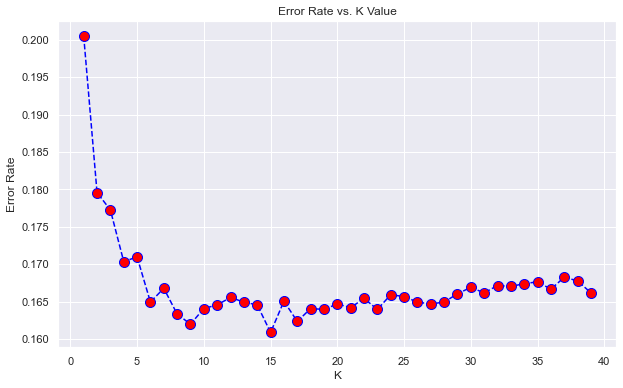

Minimum error:- 0.16090964966195453 at K = 15


In [53]:
# Plotting graph for 'Error Rate vs. K Value' to check most accurate K value
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [54]:
# Using nearest value as 9 to predict the values again
knn = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=15)

In [55]:
# predicting the values after setting n_neighbors=9
y_pred = knn.predict(x_test)

In [56]:
# Checking the accuracy of algorithm
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
# Accuracy improved from 82.9% to 83.9%

0.8390903503380455